In [1]:
#import necessary functions
from combined import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Objective: Identify malicious transactions
- True Positive: Actually bad and is flagged as bad (DESIRED)
- True Negative: Actually good and is not flagged as bad (DESIRED)
- False Negative: Actually bad and not flagged as bad 
- False Positive: Actually good and is flagged as bad 

# Varying number of transactions


In [2]:
#collect and organize data 
num_data_items = 8
min_ops_per_transaction = 3
max_ops_per_transaction = 5

starting_index = 100
increment_amount = 50
num_groupings = 6

groupings = []
x_axis_values = []
for i in range(num_groupings):
    groupings.append(get_results(num_data_items=num_data_items, num_transactions=starting_index+i*increment_amount, min_ops_per_transaction=min_ops_per_transaction, max_ops_per_transaction=max_ops_per_transaction))
    x_axis_values.append(starting_index+i*increment_amount)


defined_good_nonflagged = get_values_for_key(groupings, "defined_good_nonflagged")
defined_good_flagged = get_values_for_key(groupings, "defined_good_flagged")
defined_bad_nonflagged = get_values_for_key(groupings, "defined_bad_nonflagged")
defined_bad_flagged = get_values_for_key(groupings, "defined_bad_flagged")
predefined_good_nonflagged = get_values_for_key(groupings, "predefined_good_nonflagged")
predefined_good_flagged = get_values_for_key(groupings, "predefined_good_flagged")
predefined_bad_nonflagged = get_values_for_key(groupings, "predefined_bad_nonflagged")
predefined_bad_flagged = get_values_for_key(groupings, "predefined_bad_flagged")

print("Pre-Defined:")
print(f"True Negatives: {predefined_good_nonflagged}")
print(f"False Positives: {predefined_good_flagged}")
print(f"False Negatives: {predefined_bad_nonflagged}")
print(f"True Positives: {predefined_bad_flagged}")
print()
print("Dynamically Defined:")
print(f"True Negatives: {defined_good_nonflagged}")
print(f"False Positives: {defined_good_flagged}")
print(f"False Negatives: {defined_bad_nonflagged}")
print(f"True Positives: {defined_bad_flagged}")

Pre-Defined:
True Negatives: [88, 137, 179, 230, 268, 313]
False Positives: [7, 5, 11, 8, 17, 19]
False Negatives: [0, 0, 0, 0, 0, 0]
True Positives: [5, 8, 10, 12, 15, 18]

Dynamically Defined:
True Negatives: [95, 142, 190, 238, 285, 332]
False Positives: [0, 0, 0, 0, 0, 0]
False Negatives: [5, 8, 10, 12, 15, 18]
True Positives: [0, 0, 0, 0, 0, 0]


True Negatives: [88, 137, 179, 230, 268, 313]
False Positives: [7, 5, 11, 8, 17, 19]
False Negatives: [0, 0, 0, 0, 0, 0]
True Positives: [5, 8, 10, 12, 15, 18]


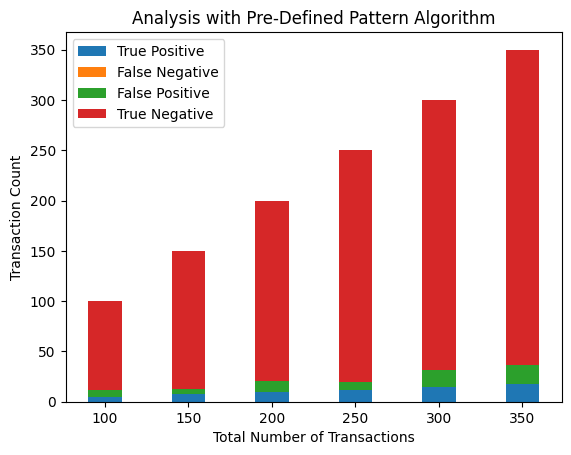

True Negatives: [95, 142, 190, 238, 285, 332]
False Positives: [0, 0, 0, 0, 0, 0]
False Negatives: [5, 8, 10, 12, 15, 18]
True Positives: [0, 0, 0, 0, 0, 0]


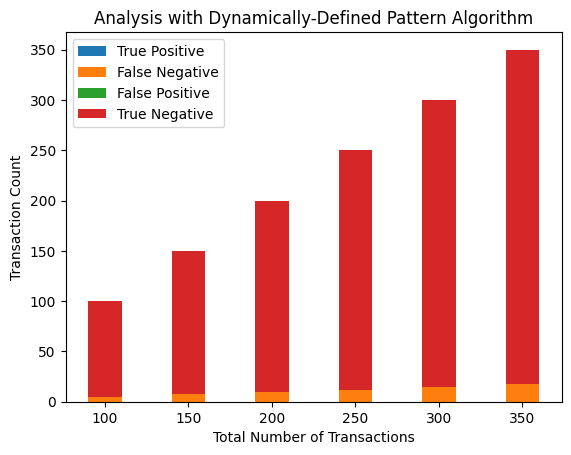

' accuracy = (predefined_bad_flagged + predefined_good_nonflagged)/(predefined_bad_flagged + predefined_bad_nonflagged + predefined_good_flagged + predefined_good_nonflagged)\nprecision = (predefined_bad_flagged)/(predefined_bad_flagged + predefined_good_flagged)\nrecall = (predefined_bad_flagged)/(predefined_bad_flagged + predefined_bad_nonflagged)\nF1 = (2*(recall * precision))/(recall + precision)\n '

In [3]:
#graph the data for predefined patterns

df = pd.DataFrame(dict(
    True_Negative = predefined_good_nonflagged,
    False_Positive = predefined_good_flagged,
    False_Negative = predefined_bad_nonflagged,
    True_Positive = predefined_bad_flagged))

print(f"True Negatives: {predefined_good_nonflagged}")
print(f"False Positives: {predefined_good_flagged}")
print(f"False Negatives: {predefined_bad_nonflagged}")
print(f"True Positives: {predefined_bad_flagged}")

# X-axis values
x_values = x_axis_values

# Bar width
bar_width = 20

# Plotting with thicker bars
plt.bar(x_values, df['True_Positive'], width=bar_width, label='True Positive')
plt.bar(x_values, df['False_Negative'], bottom=df['True_Positive'], width=bar_width, label='False Negative')
plt.bar(x_values, df['False_Positive'], bottom=df['True_Positive'] + df['False_Negative'], width=bar_width, label='False Positive')
plt.bar(x_values, df['True_Negative'], bottom=df['True_Positive'] + df['False_Negative'] + df['False_Positive'], width=bar_width, label='True Negative')

# Adding labels and legend
plt.xlabel('Total Number of Transactions')
plt.ylabel('Transaction Count')
plt.title('Analysis with Pre-Defined Pattern Algorithm')
plt.legend()

# Display the plot
plt.show()

#graph the data for no pre-defined patterns

df = pd.DataFrame(dict(
    True_Negative = defined_good_nonflagged,
    False_Positive = defined_good_flagged,
    False_Negative = defined_bad_nonflagged,
    True_Positive = defined_bad_flagged))

print(f"True Negatives: {defined_good_nonflagged}")
print(f"False Positives: {defined_good_flagged}")
print(f"False Negatives: {defined_bad_nonflagged}")
print(f"True Positives: {defined_bad_flagged}")

# X-axis values
x_values = x_axis_values

# Bar width
bar_width = 20

# Plotting with thicker bars
plt.bar(x_values, df['True_Positive'], width=bar_width, label='True Positive')
plt.bar(x_values, df['False_Negative'], bottom=df['True_Positive'], width=bar_width, label='False Negative')
plt.bar(x_values, df['False_Positive'], bottom=df['True_Positive'] + df['False_Negative'], width=bar_width, label='False Positive')
plt.bar(x_values, df['True_Negative'], bottom=df['True_Positive'] + df['False_Negative'] + df['False_Positive'], width=bar_width, label='True Negative')

# Adding labels and legend
plt.xlabel('Total Number of Transactions')
plt.ylabel('Transaction Count')
plt.title('Analysis with Dynamically-Defined Pattern Algorithm')
plt.legend()

# Display the plot
plt.show()

""" accuracy = (predefined_bad_flagged + predefined_good_nonflagged)/(predefined_bad_flagged + predefined_bad_nonflagged + predefined_good_flagged + predefined_good_nonflagged)
precision = (predefined_bad_flagged)/(predefined_bad_flagged + predefined_good_flagged)
recall = (predefined_bad_flagged)/(predefined_bad_flagged + predefined_bad_nonflagged)
F1 = (2*(recall * precision))/(recall + precision)
 """


# Varying number of data items

Pre-Defined:
True Negatives: [181, 181, 180, 180, 179, 182]
False Positives: [9, 9, 10, 10, 11, 8]
False Negatives: [0, 0, 0, 0, 0, 0]
True Positives: [10, 10, 10, 10, 10, 10]

Dynamically Defined:
True Negatives: [2, 0, 0, 0, 0, 0]
False Positives: [188, 190, 190, 190, 190, 190]
False Negatives: [0, 0, 0, 0, 0, 0]
True Positives: [10, 10, 10, 10, 10, 10]
True Negatives: [181, 181, 180, 180, 179, 182]
False Positives: [9, 9, 10, 10, 11, 8]
False Negatives: [0, 0, 0, 0, 0, 0]
True Positives: [10, 10, 10, 10, 10, 10]


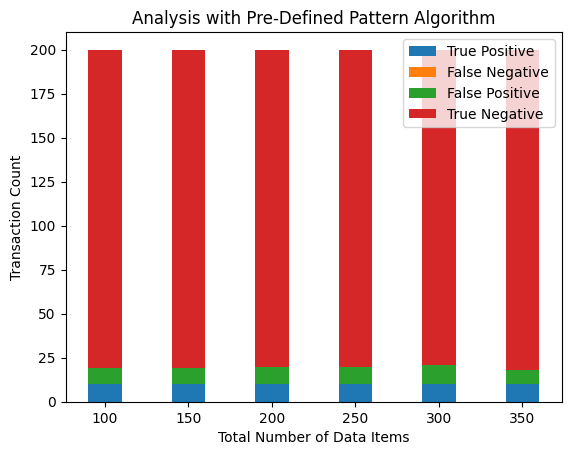

True Negatives: [2, 0, 0, 0, 0, 0]
False Positives: [188, 190, 190, 190, 190, 190]
False Negatives: [0, 0, 0, 0, 0, 0]
True Positives: [10, 10, 10, 10, 10, 10]


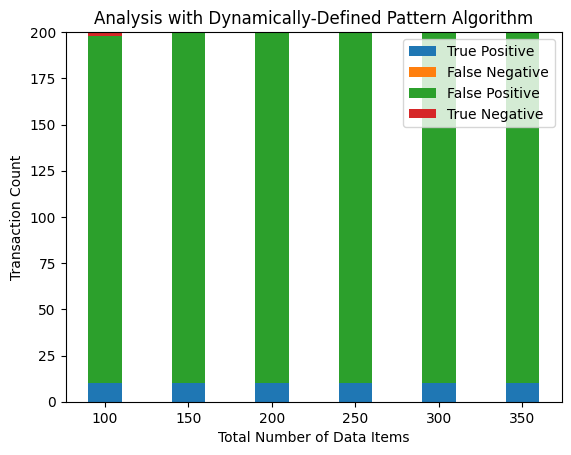

In [6]:
#collect and graph data 
num_transactions=200
min_ops_per_transaction = 10
max_ops_per_transaction = 12

#varying num data items
starting_index = 100
increment_amount = 50
num_groupings = 6

groupings = []
x_axis_values = []
for i in range(num_groupings):
    groupings.append(get_results(num_data_items=starting_index+i*increment_amount, num_transactions=num_transactions, min_ops_per_transaction=min_ops_per_transaction, max_ops_per_transaction=max_ops_per_transaction))
    x_axis_values.append(starting_index+i*increment_amount)


defined_good_nonflagged = get_values_for_key(groupings, "defined_good_nonflagged")
defined_good_flagged = get_values_for_key(groupings, "defined_good_flagged")
defined_bad_nonflagged = get_values_for_key(groupings, "defined_bad_nonflagged")
defined_bad_flagged = get_values_for_key(groupings, "defined_bad_flagged")
predefined_good_nonflagged = get_values_for_key(groupings, "predefined_good_nonflagged")
predefined_good_flagged = get_values_for_key(groupings, "predefined_good_flagged")
predefined_bad_nonflagged = get_values_for_key(groupings, "predefined_bad_nonflagged")
predefined_bad_flagged = get_values_for_key(groupings, "predefined_bad_flagged")

print("Pre-Defined:")
print(f"True Negatives: {predefined_good_nonflagged}")
print(f"False Positives: {predefined_good_flagged}")
print(f"False Negatives: {predefined_bad_nonflagged}")
print(f"True Positives: {predefined_bad_flagged}")
print()
print("Dynamically Defined:")
print(f"True Negatives: {defined_good_nonflagged}")
print(f"False Positives: {defined_good_flagged}")
print(f"False Negatives: {defined_bad_nonflagged}")
print(f"True Positives: {defined_bad_flagged}")

#graph the data for predefined patterns

df = pd.DataFrame(dict(
    True_Negative = predefined_good_nonflagged,
    False_Positive = predefined_good_flagged,
    False_Negative = predefined_bad_nonflagged,
    True_Positive = predefined_bad_flagged))

print(f"True Negatives: {predefined_good_nonflagged}")
print(f"False Positives: {predefined_good_flagged}")
print(f"False Negatives: {predefined_bad_nonflagged}")
print(f"True Positives: {predefined_bad_flagged}")

# X-axis values
x_values = x_axis_values

# Bar width
bar_width = 20

# Plotting with thicker bars
plt.bar(x_values, df['True_Positive'], width=bar_width, label='True Positive')
plt.bar(x_values, df['False_Negative'], bottom=df['True_Positive'], width=bar_width, label='False Negative')
plt.bar(x_values, df['False_Positive'], bottom=df['True_Positive'] + df['False_Negative'], width=bar_width, label='False Positive')
plt.bar(x_values, df['True_Negative'], bottom=df['True_Positive'] + df['False_Negative'] + df['False_Positive'], width=bar_width, label='True Negative')

# Adding labels and legend
plt.xlabel('Total Number of Data Items')
plt.ylabel('Transaction Count')
plt.title('Analysis with Pre-Defined Pattern Algorithm')
plt.legend()

# Display the plot
plt.show()

#graph the data for no pre-defined patterns

df = pd.DataFrame(dict(
    True_Negative = defined_good_nonflagged,
    False_Positive = defined_good_flagged,
    False_Negative = defined_bad_nonflagged,
    True_Positive = defined_bad_flagged))

print(f"True Negatives: {defined_good_nonflagged}")
print(f"False Positives: {defined_good_flagged}")
print(f"False Negatives: {defined_bad_nonflagged}")
print(f"True Positives: {defined_bad_flagged}")

# X-axis values
x_values = x_axis_values

# Bar width
bar_width = 20

# Plotting with thicker bars
plt.bar(x_values, df['True_Positive'], width=bar_width, label='True Positive')
plt.bar(x_values, df['False_Negative'], bottom=df['True_Positive'], width=bar_width, label='False Negative')
plt.bar(x_values, df['False_Positive'], bottom=df['True_Positive'] + df['False_Negative'], width=bar_width, label='False Positive')
plt.bar(x_values, df['True_Negative'], bottom=df['True_Positive'] + df['False_Negative'] + df['False_Positive'], width=bar_width, label='True Negative')

# Adding labels and legend
plt.xlabel('Total Number of Data Items')
plt.ylabel('Transaction Count')
plt.title('Analysis with Dynamically-Defined Pattern Algorithm')
plt.legend()

# Display the plot
plt.show()

#### Varying Number of Operations per Transaction

True Negatives: [180, 181, 179, 180, 176, 181]
False Positives: [10, 9, 11, 10, 14, 9]
False Negatives: [0, 0, 0, 0, 0, 1]
True Positives: [10, 10, 10, 10, 10, 9]


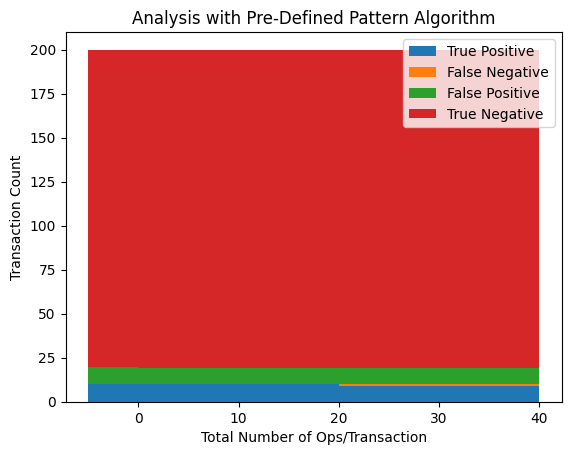

True Negatives: [0, 3, 42, 164, 190, 190]
False Positives: [190, 187, 148, 26, 0, 0]
False Negatives: [0, 0, 3, 9, 10, 10]
True Positives: [10, 10, 7, 1, 0, 0]


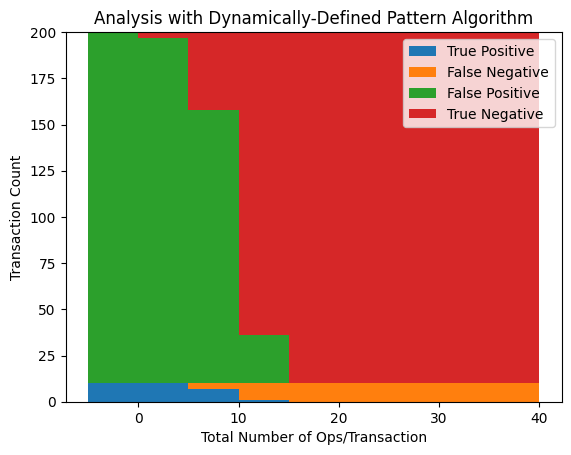

In [7]:
#collect and organize data 
num_transactions=200
num_data_items = 100

#varying num of ops per transaction
starting_index = 5
increment_amount = 5
num_groupings = 6

groupings = []
x_axis_values = []
for i in range(num_groupings):
    groupings.append(get_results(num_data_items=num_data_items, num_transactions=num_transactions, min_ops_per_transaction=starting_index+i*increment_amount, max_ops_per_transaction=starting_index+i*increment_amount))
    x_axis_values.append(starting_index+i*increment_amount)


defined_good_nonflagged = get_values_for_key(groupings, "defined_good_nonflagged")
defined_good_flagged = get_values_for_key(groupings, "defined_good_flagged")
defined_bad_nonflagged = get_values_for_key(groupings, "defined_bad_nonflagged")
defined_bad_flagged = get_values_for_key(groupings, "defined_bad_flagged")
predefined_good_nonflagged = get_values_for_key(groupings, "predefined_good_nonflagged")
predefined_good_flagged = get_values_for_key(groupings, "predefined_good_flagged")
predefined_bad_nonflagged = get_values_for_key(groupings, "predefined_bad_nonflagged")
predefined_bad_flagged = get_values_for_key(groupings, "predefined_bad_flagged")

#graph the data for predefined patterns

df = pd.DataFrame(dict(
    True_Negative = predefined_good_nonflagged,
    False_Positive = predefined_good_flagged,
    False_Negative = predefined_bad_nonflagged,
    True_Positive = predefined_bad_flagged))

print(f"True Negatives: {predefined_good_nonflagged}")
print(f"False Positives: {predefined_good_flagged}")
print(f"False Negatives: {predefined_bad_nonflagged}")
print(f"True Positives: {predefined_bad_flagged}")

# X-axis values
x_values = x_axis_values

# Bar width
bar_width = 20

# Plotting with thicker bars
plt.bar(x_values, df['True_Positive'], width=bar_width, label='True Positive')
plt.bar(x_values, df['False_Negative'], bottom=df['True_Positive'], width=bar_width, label='False Negative')
plt.bar(x_values, df['False_Positive'], bottom=df['True_Positive'] + df['False_Negative'], width=bar_width, label='False Positive')
plt.bar(x_values, df['True_Negative'], bottom=df['True_Positive'] + df['False_Negative'] + df['False_Positive'], width=bar_width, label='True Negative')

# Adding labels and legend
plt.xlabel('Total Number of Ops/Transaction')
plt.ylabel('Transaction Count')
plt.title('Analysis with Pre-Defined Pattern Algorithm')
plt.legend()

# Display the plot
plt.show()

#graph the data for no pre-defined patterns

df = pd.DataFrame(dict(
    True_Negative = defined_good_nonflagged,
    False_Positive = defined_good_flagged,
    False_Negative = defined_bad_nonflagged,
    True_Positive = defined_bad_flagged))

print(f"True Negatives: {defined_good_nonflagged}")
print(f"False Positives: {defined_good_flagged}")
print(f"False Negatives: {defined_bad_nonflagged}")
print(f"True Positives: {defined_bad_flagged}")

# X-axis values
x_values = x_axis_values

# Bar width
bar_width = 20

# Plotting with thicker bars
plt.bar(x_values, df['True_Positive'], width=bar_width, label='True Positive')
plt.bar(x_values, df['False_Negative'], bottom=df['True_Positive'], width=bar_width, label='False Negative')
plt.bar(x_values, df['False_Positive'], bottom=df['True_Positive'] + df['False_Negative'], width=bar_width, label='False Positive')
plt.bar(x_values, df['True_Negative'], bottom=df['True_Positive'] + df['False_Negative'] + df['False_Positive'], width=bar_width, label='True Negative')

# Adding labels and legend
plt.xlabel('Total Number of Ops/Transaction')
plt.ylabel('Transaction Count')
plt.title('Analysis with Dynamically-Defined Pattern Algorithm')
plt.legend()

# Display the plot
plt.show()